In [12]:
import os
import time
import pickle
import matplotlib

import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]

In [13]:
with open('results/skipgram.pkl', 'rb') as f:
    model = pickle.load(f)

In [3]:
STS_dict = {}
for item in model.keys():
    if item.find("STS") == 0 or item.find("Relatedness") > 0:
        STS_dict[item] = model[item].items()

ClassificationTask_dict = {k : v for k, v in model.items() if k not in list(STS_dict.keys())}

In [4]:
# plots
ClassificationTask_df = pd.DataFrame(ClassificationTask_dict).T
ClassificationTask_df = ClassificationTask_df.drop(columns = ['ndev', 'ntest'])

In [5]:
ClassificationTask_df

,acc,devacc,f1
CR,63.76,63.76,NaN
MPQA,68.77,68.77,NaN
MR,54.92,55.16,NaN
MRPC,66.49,67.54,79.87
SICKEntailment,56.69,56.40,NaN
SNLI,43.46,44.12,NaN
SST2,56.12,57.57,NaN
SST5,27.78,29.88,NaN
SUBJ,64.52,63.54,NaN
TREC,37.40,29.09,NaN


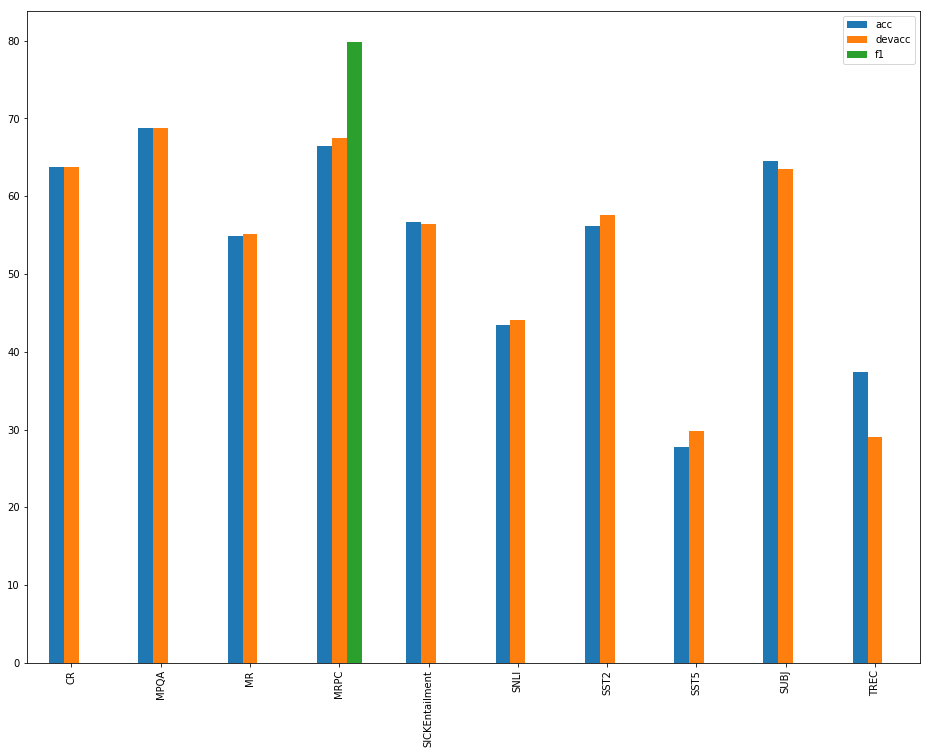

In [14]:
ClassificationTask_df.plot(kind="bar")
plt.show()

In [7]:
# STS_df = pd.DataFrame(STS_dict['STS12'])
pd.DataFrame.from_dict(STS_dict, orient='index')

,0,1,2,3,4,5,6
STS16,"(all, {'pearson': {'wmean': 0.1480387449150121...","(answer-answer, {'pearson': (0.084138708745582...","(postediting, {'pearson': (0.40500321032197845...","(question-question, {'pearson': (-0.1526176253...","(headlines, {'pearson': (0.13552256001675, 0.0...","(plagiarism, {'pearson': (0.23275609732117994,...",None
STS14,"(images, {'pearson': (-0.052712416389393564, 0...","(all, {'pearson': {'wmean': 0.0927097236988836...","(deft-news, {'pearson': (0.26136133277914747, ...","(OnWN, {'pearson': (0.01927996670499319, 0.598...","(deft-forum, {'pearson': (0.11031005048674669,...","(headlines, {'pearson': (0.04470565574862672, ...","(tweet-news, {'pearson': (0.28154484902648474,..."
STS15,"(answers-forums, {'pearson': (0.14705900938887...","(images, {'pearson': (0.01371332829443158, 0.7...","(all, {'pearson': {'wmean': 0.1800681063985169...","(answers-students, {'pearson': (0.359524173263...","(belief, {'pearson': (0.2289804045921258, 7.49...","(headlines, {'pearson': (0.15901521704553295, ...",None
STS13,"(OnWN, {'pearson': (-0.1392082108093068, 0.000...","(headlines, {'pearson': (0.05973011827205376, ...","(all, {'pearson': {'wmean': -0.016688541470326...","(FNWN, {'pearson': (0.04373230346291616, 0.550...",None,None,None
SICKRelatedness,"(ndev, 500)","(devpearson, 0.2916455885164525)","(spearman, 0.2644425899401471)","(pearson, 0.2924476178166739)","(yhat, [3.326737202703953, 3.6845136657357216,...","(ntest, 4927)","(mse, 0.9485637616518879)"
STSBenchmark,"(ndev, 1500)","(devpearson, 0.1704826571954924)","(spearman, 0.0433531480899321)","(pearson, 0.0269230014667951)","(yhat, [2.9520831629633904, 3.1042406111955643...","(ntest, 1379)","(mse, 2.5088258214651264)"
STS12,"(MSRvid, {'pearson': (-0.24319744949403818, 1....","(all, {'pearson': {'wmean': 0.0731526746865409...","(SMTeuroparl, {'pearson': (0.06948651595270236...","(surprise.SMTnews, {'pearson': (0.256344379538...","(surprise.OnWN, {'pearson': (0.286101758527897...","(MSRpar, {'pearson': (0.0813394171898822, 0.02...",None


In [8]:
STS_updated_dict = {}

In [9]:
for key, value in STS_dict.items():
    sum_ = 0.0
    for sets in value:
        if isinstance(sets[1], dict):
            if isinstance(sets[1]['pearson'], dict):
#                 print((key, (sets[1]['pearson']['mean'])))
                STS_updated_dict[key] = sets[1]['pearson']['mean'] * 100
        elif isinstance(sets[1], np.float64):
            sum_ += sets[1]
    avg = sum_*100/len(value) 
    if key not in STS_updated_dict.keys():
        STS_updated_dict[key] = avg
#     print(key, avg)

In [10]:
STS_updated_dict

{'SICKRelatedness': 25.67285082750231,
 'STS12': 9.00149243428942,
 'STS13': -1.1915263024778955,
 'STS14': 11.074823972610089,
 'STS15': 18.165842651691342,
 'STS16': 14.096059021049681,
 'STSBenchmark': 39.279780403104944}

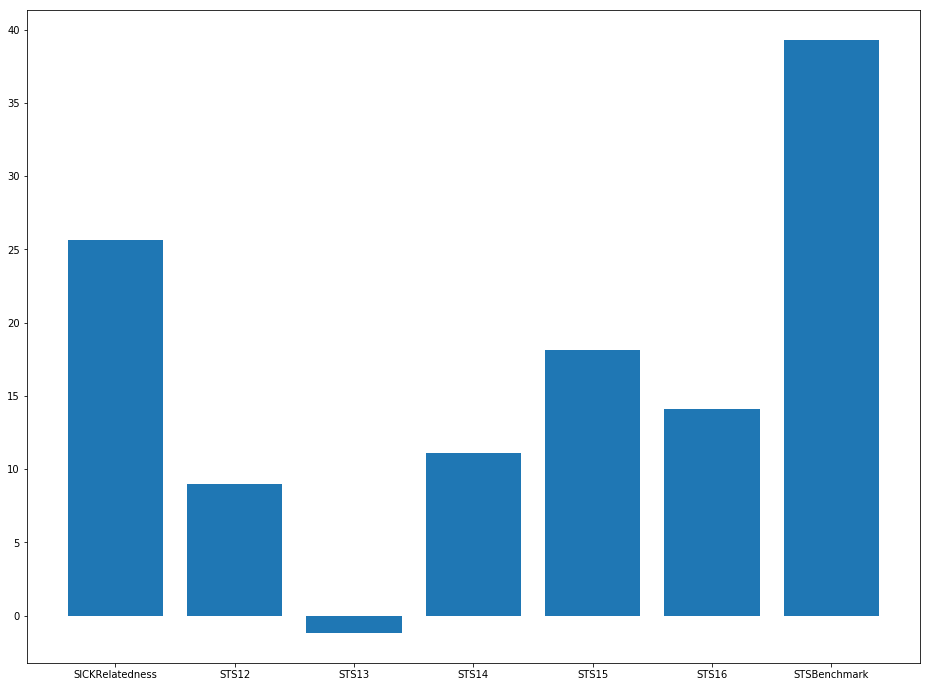

In [17]:
plt.bar(*zip(*sorted(STS_updated_dict.items())))
plt.show()